In [15]:
# Library
import pandas as pd

In [16]:
# Mesh Blocks

# Read data
mb_df = pd.read_csv('../data/raw/MB_2021.csv', encoding='ISO-8859-1')
# Data cleaning
mb_df = mb_df[mb_df.iloc[:, 13] == 2] # retain victoria data
mb_df = mb_df.iloc[:, [0, 5, 13, 14]]
mb_df_unique = mb_df[['SA2_CODE_2021', 'MB_CODE_2021']].drop_duplicates(subset='SA2_CODE_2021')

# Postal Area

# Read data
poa_df = pd.read_csv('../data/raw/POA_2021.csv', encoding='ISO-8859-1')

/var/folders/z6/6l5sbbq93f79jfqrtlht_vw40000gn/T/ipykernel_8786/3520390974.py:4: DtypeWarning: Columns (0,4,5,7,9,13) have mixed types. Specify dtype option on import or set low_memory=False.
  mb_df = pd.read_csv('../data/raw/MB_2021.csv', encoding='ISO-8859-1')
/var/folders/z6/6l5sbbq93f79jfqrtlht_vw40000gn/T/ipykernel_8786/3520390974.py:13: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  poa_df = pd.read_csv('../data/raw/POA_2021.csv', encoding='ISO-8859-1')


In [17]:
# 2016-2020

# Read data
income_16_20_df = pd.read_csv('../data/raw/income_2016-20.csv', encoding='ISO-8859-1')

# Data cleaning
income_16_20_df = income_16_20_df.iloc[651:1173] # retain victoria data
# remove unused data
income_16_20_df = income_16_20_df.drop(income_16_20_df.columns[2:22], axis=1) # retain mean income
income_16_20_df = income_16_20_df.drop(income_16_20_df.columns[7:], axis=1)
# add column name
income_16_20_df.columns = ['SA2 code', 'SA2 name', '2016', '2017','2018','2019','2020']
# change numbers to integers
income_16_20_df['SA2 code'] = income_16_20_df['SA2 code'].astype(int)

# Merge MB code
income_16_20_df = income_16_20_df.merge(mb_df_unique[['SA2_CODE_2021', 'MB_CODE_2021']], 
                                    left_on='SA2 code', right_on='SA2_CODE_2021', how='left')

income_16_20_df.rename(columns={'MB_CODE_2021': 'MB code'}, inplace=True)
income_16_20_df.drop(columns=['SA2_CODE_2021'], inplace=True)

# Merge Postcode
income_16_20_df = income_16_20_df.merge(poa_df[['POA_CODE_2021', 'MB_CODE_2021']], 
                                    left_on='MB code', right_on='MB_CODE_2021', how='left')
income_16_20_df.rename(columns={'POA_CODE_2021': 'Postcode'}, inplace=True)
income_16_20_df.drop(columns=['MB_CODE_2021'], inplace=True)

In [18]:
# SA2 2016 to 2021

# Read data
sa2_16to21_df = pd.read_csv('../data/raw/SA2_2016_to_2021.csv', encoding='ISO-8859-1')

# Data cleaning
sa2_16to21_df = sa2_16to21_df.iloc[0:-1]
sa2_16to21_df.rename(columns={sa2_16to21_df.columns[0]: 'SA2_CODE_2016'}, inplace=True) # make column names valid
sa2_16to21_df = sa2_16to21_df.dropna(subset=['SA2_CODE_2021'])
# change numbers to integers
sa2_16to21_df['SA2_CODE_2016'] = sa2_16to21_df['SA2_CODE_2016'].astype(int)
sa2_16to21_df['SA2_CODE_2021'] = sa2_16to21_df['SA2_CODE_2021'].astype(int)

In [19]:
# 2011-2016

# Read data
income_11_16_df = pd.read_csv('../data/raw/income_2011-16.csv', encoding='ISO-8859-1')

# Data cleaning
income_11_16_df = income_11_16_df.iloc[585:1047] # retain victoria data
# remove unused data
income_11_16_df = income_11_16_df.drop(income_11_16_df.columns[2:26], axis=1) # retain mean income
income_11_16_df = income_11_16_df.drop(income_11_16_df.columns[-1], axis=1) # remove 2016 data
# add column name
income_11_16_df.columns = ['SA2 code', 'SA2 name', '2011', '2012','2013','2014','2015']
# change numbers to integers
income_11_16_df['SA2 code'] = income_11_16_df['SA2 code'].astype(int)
# change 2016 SA2 code to 2021 SA2 code
income_11_16_df = income_11_16_df.merge(sa2_16to21_df[['SA2_CODE_2016', 'SA2_CODE_2021']], 
                                    left_on='SA2 code', right_on='SA2_CODE_2016', how='left')
income_11_16_df.drop(columns=['SA2 code'], inplace=True)

# Merge
# merge MB code
income_11_16_df = income_11_16_df.merge(mb_df_unique[['SA2_CODE_2021', 'MB_CODE_2021']], 
                                    left_on='SA2_CODE_2021', right_on='SA2_CODE_2021', how='left')
income_11_16_df.rename(columns={'MB_CODE_2021': 'MB code'}, inplace=True)
# merge Postcode
income_11_16_df = income_11_16_df.merge(poa_df[['POA_CODE_2021', 'MB_CODE_2021']], 
                                    left_on='MB code', right_on='MB_CODE_2021', how='left')
income_11_16_df.rename(columns={'POA_CODE_2021': 'Postcode'}, inplace=True)
income_11_16_df.drop(columns=['MB_CODE_2021'], inplace=True)

In [20]:
# SA2 2011 to 2016

# Read data
sa2_11to16_df = pd.read_csv('../data/raw/SA2_2011_to_2016.csv', encoding='ISO-8859-1')

# Data cleaning
sa2_11to16_df = sa2_11to16_df.iloc[6:-3]
sa2_11to16_df = sa2_11to16_df.iloc[:, [0, 1, 2, 3]]
sa2_11to16_df.columns = ['SA2_CODE_2011', 'SA2_NAME_2011', 'SA2_CODE_2016', 'SA2_NAME_2016']
# change numbers to integers
sa2_11to16_df['SA2_CODE_2011'] = sa2_11to16_df['SA2_CODE_2011'].astype(int)
sa2_11to16_df['SA2_CODE_2016'] = sa2_11to16_df['SA2_CODE_2016'].astype(int)


In [21]:
# 2005-2010

# Read data
income_05_10_df = pd.read_csv('../data/raw/income_2005-10.csv', encoding='ISO-8859-1')

# Data cleaning
income_05_10_df = income_05_10_df.iloc[542:970] # retain victoria data
# remove unused data
income_05_10_df = income_05_10_df.drop(income_05_10_df.columns[2:104], axis=1)
# add column name
income_05_10_df.columns = ['SA2 code', 'SA2 name', '2005', '2006','2007','2008','2009', '2010']
# change numbers to integers
income_05_10_df['SA2 code'] = income_05_10_df['SA2 code'].astype(int)

# Change code from 2011 to 2021
# change 2011 SA2 code to 2016 SA2 code
income_05_10_df = income_05_10_df.merge(sa2_11to16_df[['SA2_CODE_2011', 'SA2_CODE_2016']], 
                                    left_on='SA2 code', right_on='SA2_CODE_2011', how='left')
income_05_10_df.drop(columns=['SA2 code'], inplace=True)
# change 2016 SA2 code to 2021 SA2 code
income_05_10_df = income_05_10_df.merge(sa2_16to21_df[['SA2_CODE_2016', 'SA2_CODE_2021']], 
                                    left_on='SA2_CODE_2016', right_on='SA2_CODE_2016', how='left')

# Merge
# merge MB code
income_05_10_df = income_05_10_df.merge(mb_df_unique[['SA2_CODE_2021', 'MB_CODE_2021']], 
                                    left_on='SA2_CODE_2021', right_on='SA2_CODE_2021', how='left')
income_05_10_df.rename(columns={'MB_CODE_2021': 'MB code'}, inplace=True)
#income_05_10_df.drop(columns=['SA2_CODE_2021'], inplace=True)
# merge Postcode
income_05_10_df = income_05_10_df.merge(poa_df[['POA_CODE_2021', 'MB_CODE_2021']], 
                                    left_on='MB code', right_on='MB_CODE_2021', how='left')
income_05_10_df.rename(columns={'POA_CODE_2021': 'Postcode'}, inplace=True)
income_05_10_df.drop(columns=['MB_CODE_2021'], inplace=True)

In [22]:
# Combine three df
income_05_20_df = income_16_20_df.merge(income_11_16_df[['SA2_CODE_2021', '2011', '2012', '2013', '2014', '2015']], 
                                        left_on='SA2 code', right_on='SA2_CODE_2021', how='left')

income_05_20_df = income_05_20_df.merge(income_05_10_df[['SA2_CODE_2021', '2005', '2006', '2007', '2008', '2009','2010']], 
                                        left_on='SA2 code', right_on='SA2_CODE_2021', how='left')

# Data cleaning
income_05_20_df = income_05_20_df.iloc[:, [0, 1, 8, 16, 17, 18, 19, 20, 21, 10, 11, 12, 13, 14, 2, 3, 4, 5, 6]]
columns_to_convert = income_05_20_df.columns[3:]
# change data type to numeric
income_05_20_df[columns_to_convert] = (income_05_20_df[columns_to_convert].replace({',': '', '\s+': ''}, regex=True).apply(pd.to_numeric, errors='coerce').fillna(0)).astype(int)
income_05_20_df['SA2 code'] = pd.to_numeric(income_05_20_df['SA2 code'], errors='coerce').astype(int)
income_05_20_df['Postcode'] = pd.to_numeric(income_05_20_df['Postcode'], errors='coerce').astype(int)

# Combine data with same postcode
income_05_20_df = income_05_20_df.iloc[:, 2:]
income_05_20_merged_df = income_05_20_df.groupby('Postcode').sum().reset_index()

In [23]:
print(income_05_20_merged_df.iloc[3,])
print(len(income_05_20_df))
print(len(income_05_20_merged_df))

Postcode     3004
2005        54551
2006        61427
2007        62827
2008        67588
2009        64954
2010        75522
2011        71516
2012        73232
2013        74154
2014        73998
2015        75285
2016        55727
2017            0
2018        38825
2019            0
2020        45072
Name: 3, dtype: int64
565
329


In [24]:
# Save data
income_05_20_merged_df.to_csv('../data/landing/preprocessed_income_2005-20.csv', index=False)

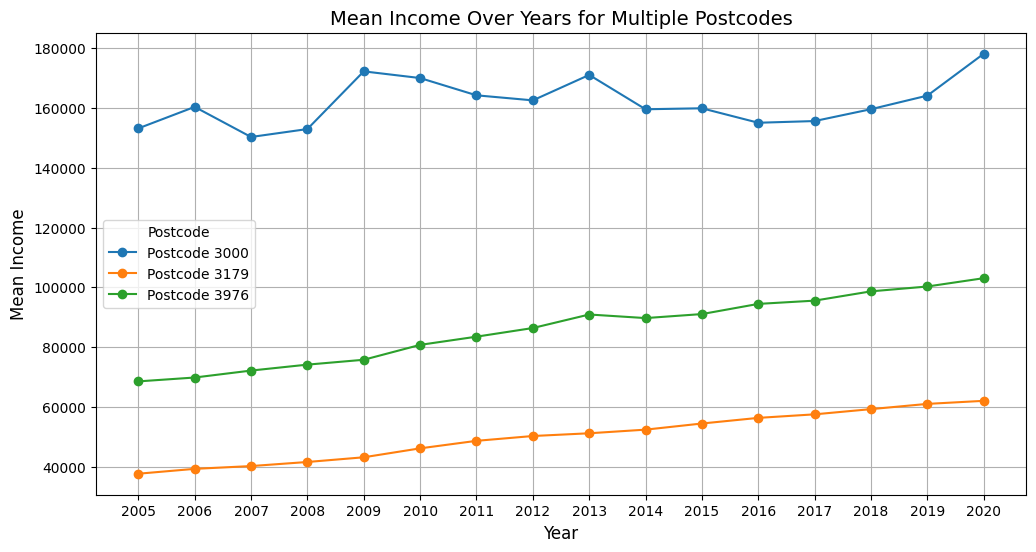

In [25]:
# Visualize income
import matplotlib.pyplot as plt

# read data
preprocessed_income_df = pd.read_csv('../data/landing/preprocessed_income_2005-20.csv', encoding='ISO-8859-1')

# plot
preprocessed_income_df = preprocessed_income_df.set_index('Postcode')
selected_rows = preprocessed_income_df.loc[[3000, 3179, 3976]]

plt.figure(figsize=(12,6))
for postcode, row_data in selected_rows.iterrows():
    plt.plot(row_data.index, row_data.values, marker='o', linestyle='-', label=f'Postcode {postcode}')

plt.title('Mean Income Over Years for Multiple Postcodes', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Income', fontsize=12)
plt.legend(title="Postcode")
plt.grid(True)
plt.show()

In [26]:
# Predict income in 2000-2004, 2021-2025
import numpy as np
from sklearn.linear_model import LinearRegression

preprocessed_income_df['2000'] = None
preprocessed_income_df['2001'] = None
preprocessed_income_df['2002'] = None
preprocessed_income_df['2003'] = None
preprocessed_income_df['2004'] = None
preprocessed_income_df['2021'] = None
preprocessed_income_df['2022'] = None
preprocessed_income_df['2023'] = None
preprocessed_income_df['2024'] = None
preprocessed_income_df['2025'] = None
preprocessed_income_df['2026'] = None
preprocessed_income_df['2027'] = None

years = list(map(str, range(2005, 2021)))
prediction_years = list(map(str, range(2000, 2005))) + list(map(str, range(2021, 2028)))

for postcode, row_data in preprocessed_income_df.iterrows():
    # remove invalid data
    valid_years = [year for year in years if row_data[year] > 0]
    valid_incomes = row_data[valid_years].values.astype(float)
    
    if len(valid_years) > 1:
        X = pd.DataFrame(valid_years).astype(float)
        y = np.log(valid_incomes)
        
        model = LinearRegression()
        model.fit(X, y)
        
        # predict 2000-2004, 2021-2027 and invalid data
        for year in prediction_years + years:
            if row_data[year] == 0 or year in prediction_years:
                predicted_income = np.exp(model.predict([[float(year)]])[0])
                preprocessed_income_df.at[postcode, year] = round(predicted_income)

# reordering columns     
for year in reversed(['2004', '2003', '2002', '2001', '2000']):
    col_data = preprocessed_income_df.pop(year)
    preprocessed_income_df.insert(preprocessed_income_df.columns.get_loc('2005'), year, col_data)

preprocessed_income_df = preprocessed_income_df.reset_index()

In [27]:
# Save data
preprocessed_income_df.to_csv('../data/landing/income_2000-27.csv', index=False)

Postcode      3000
2000        154905
2001        155431
2002        155959
2003        156488
2004        157020
2005        153156
2006        160347
2007        150282
2008        152934
2009        172224
2010        169989
2011        164214
2012        162528
2013        171033
2014        159549
2015        159876
2016        155041
2017        155609
2018        159578
2019        164117
2020        178122
2021        166337
2022        166902
2023        167469
2024        168037
2025        168608
2026        169181
2027        169755
Name: 0, dtype: object


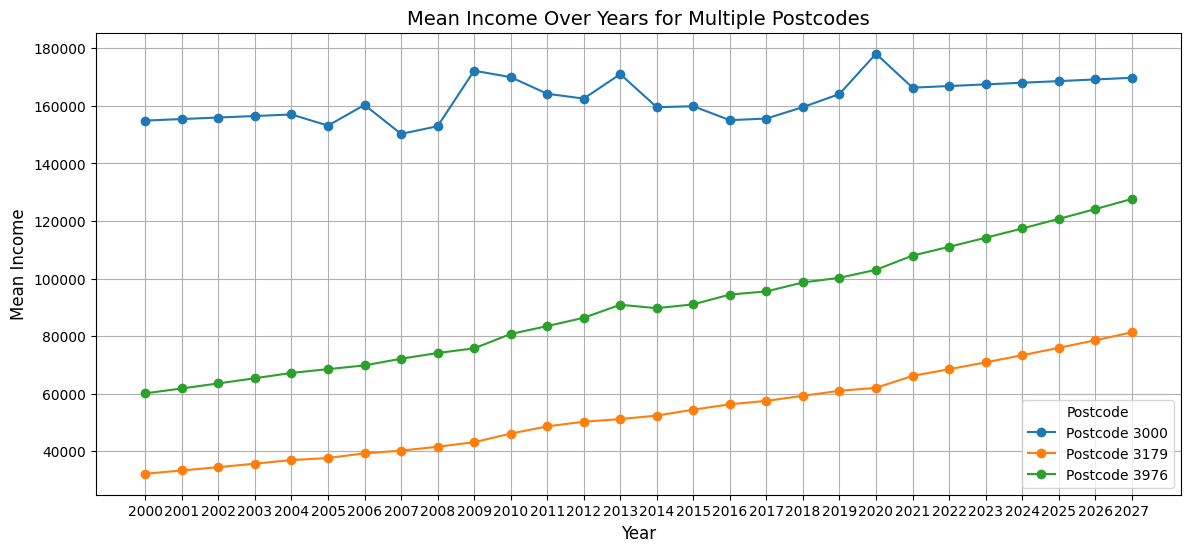

In [28]:
# Check prediction
print(preprocessed_income_df.iloc[0,])

# plot
preprocessed_income_df = preprocessed_income_df.set_index('Postcode')
selected_rows = preprocessed_income_df.loc[[3000, 3179, 3976]]

plt.figure(figsize=(14,6))
for postcode, row_data in selected_rows.iterrows():
    plt.plot(row_data.index, row_data.values, marker='o', linestyle='-', label=f'Postcode {postcode}')

plt.title('Mean Income Over Years for Multiple Postcodes', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Income', fontsize=12)
plt.legend(title="Postcode")
plt.grid(True)
plt.show()